# https://qiita.com/tizuo/items/b9af70e8cdc7fb69397f

In [1]:
# https://oku.edu.mie-u.ac.jp/~okumura/stat/160118.html
!wget https://oku.edu.mie-u.ac.jp/~okumura/stat/data/tokyo-weather-2003-2012.csv
!wget https://oku.edu.mie-u.ac.jp/~okumura/stat/data/icecream.csv

--2021-05-29 12:49:22--  https://oku.edu.mie-u.ac.jp/~okumura/stat/data/tokyo-weather-2003-2012.csv
Resolving oku.edu.mie-u.ac.jp (oku.edu.mie-u.ac.jp)... 133.67.87.218
Connecting to oku.edu.mie-u.ac.jp (oku.edu.mie-u.ac.jp)|133.67.87.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2815 (2.7K) [text/csv]
Saving to: ‘tokyo-weather-2003-2012.csv.3’

tokyo-weather-2003- 100%[===================>]   2.75K  --.-KB/s    in 0s      

2021-05-29 12:49:22 (205 MB/s) - ‘tokyo-weather-2003-2012.csv.3’ saved [2815/2815]

--2021-05-29 12:49:23--  https://oku.edu.mie-u.ac.jp/~okumura/stat/data/icecream.csv
Resolving oku.edu.mie-u.ac.jp (oku.edu.mie-u.ac.jp)... 133.67.87.218
Connecting to oku.edu.mie-u.ac.jp (oku.edu.mie-u.ac.jp)|133.67.87.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1587 (1.5K) [text/csv]
Saving to: ‘icecream.csv.2’

icecream.csv.2      100%[===================>]   1.55K  --.-KB/s    in 0s      

2021-05-29 12:49:23 (166

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib.font_manager import FontProperties

# matplotlib.use("Agg")
# !sudo apt install -y fonts-migmix #Ubuntuの場合
# font_path = "/usr/share/fonts/truetype/migmix/migmix-1p-regular.ttf"
# font_prop = FontProperties(fname=font_path)
# matplotlib.rcParams["font.family"] = font_prop.get_name()
np.set_printoptions(precision=3, suppress=True)

In [6]:
df_weather = pd.read_csv('tokyo-weather-2003-2012.csv', encoding="CP932", engine='python', skipfooter=1)
df_weather

,年,月,日最高気温の平均(℃),降水量の合計(mm),平均湿度(％),日最高気温25℃以上日数(日)
0,2003,1,9.3,101.0,46,0
1,2003,2,9.9,53.5,52,0
2,2003,3,12.7,159.5,49,0
3,2003,4,19.2,121.0,61,3
4,2003,5,22.4,172.5,65,7
...,...,...,...,...,...,...
114,2012,7,30.1,130.0,75,27
115,2012,8,33.1,25.0,69,31
116,2012,9,29.8,214.5,73,27
117,2012,10,23.0,154.5,65,9


In [7]:
df_ice_sales = pd.read_csv('icecream.csv', encoding="CP932", engine='python', skipfooter=1, header=1)
df_ice_sales

,年,月,アイスクリーム
0,2003,1,331
1,2003,2,268
2,2003,3,365
3,2003,4,492
4,2003,5,632
...,...,...,...
114,2012,7,1165
115,2012,8,1332
116,2012,9,849
117,2012,10,515


,ice_sales,temp,rain,humidity,over25deg_days
0,331,9.3,101.0,46,0
1,268,9.9,53.5,52,0
2,365,12.7,159.5,49,0
3,492,19.2,121.0,61,3
4,632,22.4,172.5,65,7


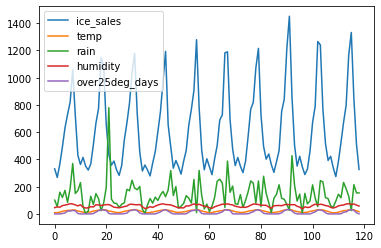

In [8]:
df = pd.merge(left=df_ice_sales, right=df_weather, on=['年','月'])
df.rename(columns={"アイスクリーム": 'ice_sales', 
                   "日最高気温の平均(℃)": "temp",
                   "降水量の合計(mm)": "rain",
                   "平均湿度(％)": "humidity",
                   "日最高気温25℃以上日数(日)": "over25deg_days",
                   }, inplace=True)
df = df[['ice_sales', "temp", "rain", "humidity", "over25deg_days"]]
df.plot(legend=True)
df.head()

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(df.values)
dataset[:5]

array([[0.053, 0.04 , 0.126, 0.256, 0.   ],
       [0.   , 0.063, 0.064, 0.41 , 0.   ],
       [0.082, 0.175, 0.201, 0.333, 0.   ],
       [0.189, 0.433, 0.151, 0.641, 0.097],
       [0.308, 0.56 , 0.218, 0.744, 0.226]])

In [10]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:,:]
print(train.shape, test.shape)

(79, 5) (40, 5)


In [11]:
# convert an array of values into a dataset matrix
# if you give look_back 3, a part of the array will be like this: Jan, Feb, Mar
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        xset = []
        for j in range(dataset.shape[1]):
            a = dataset[i:(i+look_back), j]
            xset.append(a)
        dataY.append(dataset[i + look_back, 0])
        dataX.append(xset)
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(train[:20])
print(trainX.shape)
print(trainX[0:2])
print(trainY)

# reshape input to be [samples, time steps(number of variables), features] *convert time series into column
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))


[[0.053 0.04  0.126 0.256 0.   ]
 [0.    0.063 0.064 0.41  0.   ]
 [0.082 0.175 0.201 0.333 0.   ]
 [0.189 0.433 0.151 0.641 0.097]
 [0.308 0.56  0.218 0.744 0.226]
 [0.391 0.726 0.105 0.846 0.677]
 [0.467 0.702 0.237 1.    0.677]
 [0.667 0.841 0.472 0.949 0.839]
 [0.385 0.786 0.189 0.769 0.742]
 [0.137 0.52  0.216 0.59  0.097]
 [0.08  0.361 0.291 0.795 0.   ]
 [0.124 0.194 0.064 0.359 0.   ]
 [0.07  0.071 0.    0.179 0.   ]
 [0.046 0.183 0.021 0.231 0.   ]
 [0.084 0.226 0.162 0.436 0.   ]
 [0.203 0.516 0.085 0.385 0.097]
 [0.337 0.611 0.187 0.795 0.419]
 [0.426 0.762 0.14  0.769 0.774]
 [0.744 0.984 0.026 0.667 1.   ]
 [0.686 0.901 0.098 0.744 0.903]]
(66, 5, 12)
[[[0.053 0.    0.082 0.189 0.308 0.391 0.467 0.667 0.385 0.137 0.08
   0.124]
  [0.04  0.063 0.175 0.433 0.56  0.726 0.702 0.841 0.786 0.52  0.361
   0.194]
  [0.126 0.064 0.201 0.151 0.218 0.105 0.237 0.472 0.189 0.216 0.291
   0.064]
  [0.256 0.41  0.333 0.641 0.744 0.846 1.    0.949 0.769 0.59  0.795
   0.359]
  [0.    0. 

In [12]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(testX.shape[1], look_back)))	#shape：変数数、遡る時間数
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=1, verbose=2)

Epoch 1/1000
66/66 - 15s - loss: 0.1694
Epoch 2/1000
66/66 - 0s - loss: 0.0743
Epoch 3/1000
66/66 - 0s - loss: 0.0416
Epoch 4/1000
66/66 - 0s - loss: 0.0265
Epoch 5/1000
66/66 - 0s - loss: 0.0199
Epoch 6/1000
66/66 - 0s - loss: 0.0155
Epoch 7/1000
66/66 - 0s - loss: 0.0132
Epoch 8/1000
66/66 - 0s - loss: 0.0122
Epoch 9/1000
66/66 - 0s - loss: 0.0111
Epoch 10/1000
66/66 - 0s - loss: 0.0095
Epoch 11/1000
66/66 - 0s - loss: 0.0089
Epoch 12/1000
66/66 - 0s - loss: 0.0082
Epoch 13/1000
66/66 - 0s - loss: 0.0074
Epoch 14/1000
66/66 - 0s - loss: 0.0073
Epoch 15/1000
66/66 - 0s - loss: 0.0063
Epoch 16/1000
66/66 - 0s - loss: 0.0063
Epoch 17/1000
66/66 - 0s - loss: 0.0054
Epoch 18/1000
66/66 - 0s - loss: 0.0052
Epoch 19/1000
66/66 - 0s - loss: 0.0050
Epoch 20/1000
66/66 - 0s - loss: 0.0046
Epoch 21/1000
66/66 - 0s - loss: 0.0048
Epoch 22/1000
66/66 - 0s - loss: 0.0042
Epoch 23/1000
66/66 - 0s - loss: 0.0039
Epoch 24/1000
66/66 - 0s - loss: 0.0038
Epoch 25/1000
66/66 - 0s - loss: 0.0037
Epoch 26

66/66 - 0s - loss: 6.1606e-04
Epoch 197/1000
66/66 - 0s - loss: 6.3586e-04
Epoch 198/1000
66/66 - 0s - loss: 5.9696e-04
Epoch 199/1000
66/66 - 0s - loss: 5.0045e-04
Epoch 200/1000
66/66 - 0s - loss: 7.2397e-04
Epoch 201/1000
66/66 - 0s - loss: 5.6806e-04
Epoch 202/1000
66/66 - 0s - loss: 7.0483e-04
Epoch 203/1000
66/66 - 0s - loss: 5.5582e-04
Epoch 204/1000
66/66 - 0s - loss: 7.9082e-04
Epoch 205/1000
66/66 - 0s - loss: 6.9444e-04
Epoch 206/1000
66/66 - 0s - loss: 5.8808e-04
Epoch 207/1000
66/66 - 0s - loss: 6.0280e-04
Epoch 208/1000
66/66 - 0s - loss: 5.6059e-04
Epoch 209/1000
66/66 - 0s - loss: 7.0227e-04
Epoch 210/1000
66/66 - 0s - loss: 5.6119e-04
Epoch 211/1000
66/66 - 0s - loss: 5.8009e-04
Epoch 212/1000
66/66 - 0s - loss: 5.9925e-04
Epoch 213/1000
66/66 - 0s - loss: 5.9030e-04
Epoch 214/1000
66/66 - 0s - loss: 7.8671e-04
Epoch 215/1000
66/66 - 0s - loss: 4.8275e-04
Epoch 216/1000
66/66 - 0s - loss: 6.0658e-04
Epoch 217/1000
66/66 - 0s - loss: 6.8054e-04
Epoch 218/1000
66/66 - 0s

Epoch 379/1000
66/66 - 0s - loss: 2.7513e-04
Epoch 380/1000
66/66 - 0s - loss: 2.8511e-04
Epoch 381/1000
66/66 - 0s - loss: 2.6427e-04
Epoch 382/1000
66/66 - 0s - loss: 3.0914e-04
Epoch 383/1000
66/66 - 0s - loss: 2.4829e-04
Epoch 384/1000
66/66 - 0s - loss: 2.6217e-04
Epoch 385/1000
66/66 - 0s - loss: 2.5122e-04
Epoch 386/1000
66/66 - 0s - loss: 3.1481e-04
Epoch 387/1000
66/66 - 0s - loss: 3.7089e-04
Epoch 388/1000
66/66 - 0s - loss: 2.3861e-04
Epoch 389/1000
66/66 - 0s - loss: 2.1619e-04
Epoch 390/1000
66/66 - 0s - loss: 3.8972e-04
Epoch 391/1000
66/66 - 0s - loss: 2.5746e-04
Epoch 392/1000
66/66 - 0s - loss: 2.2686e-04
Epoch 393/1000
66/66 - 0s - loss: 2.2729e-04
Epoch 394/1000
66/66 - 0s - loss: 1.8167e-04
Epoch 395/1000
66/66 - 0s - loss: 3.0192e-04
Epoch 396/1000
66/66 - 0s - loss: 2.6392e-04
Epoch 397/1000
66/66 - 0s - loss: 2.3670e-04
Epoch 398/1000
66/66 - 0s - loss: 2.4511e-04
Epoch 399/1000
66/66 - 0s - loss: 3.1976e-04
Epoch 400/1000
66/66 - 0s - loss: 2.5960e-04
Epoch 401/

66/66 - 0s - loss: 3.0364e-04
Epoch 562/1000
66/66 - 0s - loss: 1.1194e-04
Epoch 563/1000
66/66 - 0s - loss: 1.2770e-04
Epoch 564/1000
66/66 - 0s - loss: 1.9157e-04
Epoch 565/1000
66/66 - 0s - loss: 1.0223e-04
Epoch 566/1000
66/66 - 0s - loss: 1.3013e-04
Epoch 567/1000
66/66 - 0s - loss: 1.4626e-04
Epoch 568/1000
66/66 - 0s - loss: 1.0073e-04
Epoch 569/1000
66/66 - 0s - loss: 1.1434e-04
Epoch 570/1000
66/66 - 0s - loss: 1.1391e-04
Epoch 571/1000
66/66 - 0s - loss: 1.1398e-04
Epoch 572/1000
66/66 - 0s - loss: 1.2087e-04
Epoch 573/1000
66/66 - 0s - loss: 1.0570e-04
Epoch 574/1000
66/66 - 0s - loss: 1.2482e-04
Epoch 575/1000
66/66 - 0s - loss: 1.4541e-04
Epoch 576/1000
66/66 - 0s - loss: 1.2819e-04
Epoch 577/1000
66/66 - 0s - loss: 1.6984e-04
Epoch 578/1000
66/66 - 0s - loss: 1.2163e-04
Epoch 579/1000
66/66 - 0s - loss: 1.0228e-04
Epoch 580/1000
66/66 - 0s - loss: 1.0076e-04
Epoch 581/1000
66/66 - 0s - loss: 1.1235e-04
Epoch 582/1000
66/66 - 0s - loss: 1.0667e-04
Epoch 583/1000
66/66 - 0s

Epoch 744/1000
66/66 - 0s - loss: 8.6541e-05
Epoch 745/1000
66/66 - 0s - loss: 1.0489e-04
Epoch 746/1000
66/66 - 0s - loss: 4.3771e-05
Epoch 747/1000
66/66 - 0s - loss: 8.5616e-05
Epoch 748/1000
66/66 - 0s - loss: 6.1526e-05
Epoch 749/1000
66/66 - 0s - loss: 4.0018e-05
Epoch 750/1000
66/66 - 0s - loss: 6.0259e-05
Epoch 751/1000
66/66 - 0s - loss: 1.0223e-04
Epoch 752/1000
66/66 - 0s - loss: 5.1863e-05
Epoch 753/1000
66/66 - 0s - loss: 5.0735e-05
Epoch 754/1000
66/66 - 0s - loss: 5.2064e-05
Epoch 755/1000
66/66 - 0s - loss: 7.0251e-05
Epoch 756/1000
66/66 - 0s - loss: 7.9004e-05
Epoch 757/1000
66/66 - 0s - loss: 6.6697e-05
Epoch 758/1000
66/66 - 0s - loss: 5.5166e-05
Epoch 759/1000
66/66 - 0s - loss: 4.6888e-05
Epoch 760/1000
66/66 - 0s - loss: 1.0038e-04
Epoch 761/1000
66/66 - 0s - loss: 1.1771e-04
Epoch 762/1000
66/66 - 0s - loss: 5.7657e-05
Epoch 763/1000
66/66 - 0s - loss: 5.9245e-05
Epoch 764/1000
66/66 - 0s - loss: 4.5509e-05
Epoch 765/1000
66/66 - 0s - loss: 4.6515e-05
Epoch 766/

66/66 - 0s - loss: 5.2799e-05
Epoch 927/1000
66/66 - 0s - loss: 9.4165e-05
Epoch 928/1000
66/66 - 0s - loss: 1.2327e-04
Epoch 929/1000
66/66 - 0s - loss: 1.2621e-04
Epoch 930/1000
66/66 - 0s - loss: 2.4344e-04
Epoch 931/1000
66/66 - 0s - loss: 4.1129e-05
Epoch 932/1000
66/66 - 0s - loss: 5.0945e-05
Epoch 933/1000
66/66 - 0s - loss: 3.7110e-05
Epoch 934/1000
66/66 - 0s - loss: 3.1582e-05
Epoch 935/1000
66/66 - 0s - loss: 6.4033e-05
Epoch 936/1000
66/66 - 0s - loss: 5.1673e-05
Epoch 937/1000
66/66 - 0s - loss: 3.3994e-05
Epoch 938/1000
66/66 - 0s - loss: 3.7307e-05
Epoch 939/1000
66/66 - 0s - loss: 3.5044e-05
Epoch 940/1000
66/66 - 0s - loss: 3.0201e-05
Epoch 941/1000
66/66 - 0s - loss: 2.3326e-05
Epoch 942/1000
66/66 - 0s - loss: 4.0830e-05
Epoch 943/1000
66/66 - 0s - loss: 2.3954e-05
Epoch 944/1000
66/66 - 0s - loss: 2.3796e-05
Epoch 945/1000
66/66 - 0s - loss: 2.5763e-05
Epoch 946/1000
66/66 - 0s - loss: 4.2368e-05
Epoch 947/1000
66/66 - 0s - loss: 9.4987e-05
Epoch 948/1000
66/66 - 0s

In [15]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

pad_col = np.zeros(dataset.shape[1]-1)
def pad_array(val):
    return np.array([np.insert(pad_col, 0, x) for x in val])

trainPredict = scaler.inverse_transform(pad_array(trainPredict))
trainY = scaler.inverse_transform(pad_array(trainY))
testPredict = scaler.inverse_transform(pad_array(testPredict))
testY = scaler.inverse_transform(pad_array(testY))

trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 7.95 RMSE
Test Score: 108.43 RMSE
